In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [26]:
import pandas as pd
dia=pd.read_excel("/content/drive/MyDrive/diabetes (1).xlsx")
dia.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [27]:
dia.isnull().sum()

,0
preg,0
plas,0
pres,0
skin,0
insu,0
mass,0
pedi,0
age,0
class,0


In [28]:
ind = dia[['age','mass','insu','plas']]
dep = dia['class']

In [29]:
Logr = LogisticRegression()

In [30]:
Logr.fit(ind,dep)

LogisticRegression()

In [31]:
import pandas as pd
age = int(input("Enter the age:"))
mass = int(input("Enter the mass:"))
insulin = int(input("Enter the insulin:"))
plasma = int(input("Enter the plasma: "))

# Create a DataFrame for prediction using the collected inputs
# The column names must match those used during training
new_patient_data = pd.DataFrame([[age, mass, insulin, plasma]], columns=['age', 'mass', 'insu', 'plas'])

# Make the prediction
pred = Logr.predict(new_patient_data)

print(pred)

Enter the age:85
Enter the mass:95
Enter the insulin:65
Enter the plasma: 69
['tested_positive']


In [32]:
Logr.score(ind,dep)

0.7669270833333334

In [33]:
from sklearn.metrics import accuracy_score
pval = Logr.predict(ind)
accuracy_score(dep,pval)

0.7669270833333334

In [34]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dia['class_encoded'] = label_encoder.fit_transform(dia['class'])

# Create a dictionary for the mapping
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:", mapping)

dia.head()

Label Encoding Mapping: {'tested_negative': np.int64(0), 'tested_positive': np.int64(1)}


,preg,plas,pres,skin,insu,mass,pedi,age,class,class_encoded
0,6,148,72,35,0,33.6,0.627,50,tested_positive,1
1,1,85,66,29,0,26.6,0.351,31,tested_negative,0
2,8,183,64,0,0,23.3,0.672,32,tested_positive,1
3,1,89,66,23,94,28.1,0.167,21,tested_negative,0
4,0,137,40,35,168,43.1,2.288,33,tested_positive,1


In [35]:
dia['decoded_class'] = label_encoder.inverse_transform(dia['class_encoded'])
dia.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class,class_encoded,decoded_class
0,6,148,72,35,0,33.6,0.627,50,tested_positive,1,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative,0,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive,1,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative,0,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive,1,tested_positive


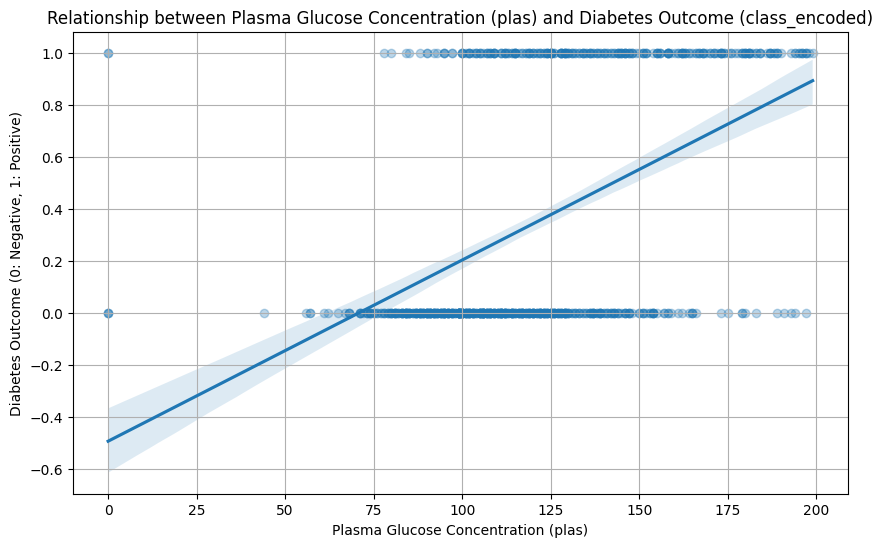

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(x='plas', y='class_encoded', data=dia, scatter_kws={'alpha':0.3})
plt.title('Relationship between Plasma Glucose Concentration (plas) and Diabetes Outcome (class_encoded)')
plt.xlabel('Plasma Glucose Concentration (plas)')
plt.ylabel('Diabetes Outcome (0: Negative, 1: Positive)')
plt.grid(True)
plt.show()